# import libraries

In [107]:
#librries
import numpy as np
import random
import matplotlib.pyplot as plt

In [108]:
size = 10
obstacle_density = 30
start= (9,0)
#Goal cell
goal = (0,6)

class GridEnvironment:

   def __init__(self, size, obstacle_density):
        self.size = size
        self.obstacle_density = obstacle_density
        self.grid = self.generate_grid()

   def generate_grid(self):
        # Generate a grid with obstacles based on the specified density
        grid = np.zeros((self.size, self.size), dtype=int)
        num_obstacles = int(self.size * self.size * self.obstacle_density / 100)
        for _ in range(num_obstacles):
            x, y = random.randint(0, self.size - 1), random.randint(0, self.size - 1)
            grid[x, y] = 1  # 1 represents an obstacle
        return grid


In [109]:
# Create grid environment
####################################################
grid_env = GridEnvironment(size, obstacle_density)

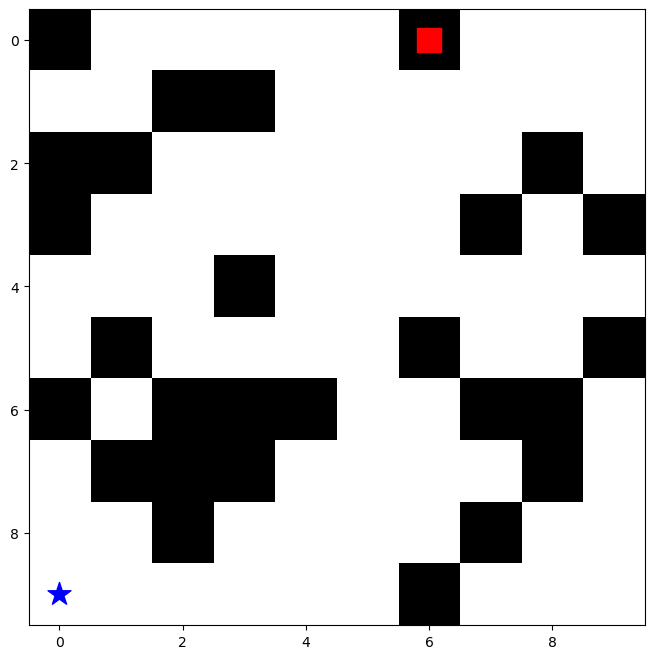

In [110]:
plt.figure(figsize=(8, 8))

# Set obstacle color to black and free path color to white
cmap = plt.cm.binary
cmap.set_bad(color='black')
cmap.set_over(color='white')

plt.imshow(grid_env.grid, cmap=cmap, origin='upper')

plt.scatter(start[1], start[0], color='blue', s=300, marker='*', label='Start')
plt.scatter(goal[1], goal[0], color='red', s=300, marker='s', label='Goal')

In [111]:
################################################################
grid=grid_env.grid


In [112]:

# Constants
GRID_SIZE = 10
POPULATION_SIZE = 100
MAX_GENERATIONS = 9
MUTATION_RATE = 0.1


In [113]:

# Function to initialize the population with random paths
def initialize_population():
    population = []
    for _ in range(POPULATION_SIZE):
        path = [(start[0], start[1])]
       # print('start zero', start[0], 'start one', start[1])
        for _ in range(GRID_SIZE * 2):  # Maximum path length
            neighbors = get_valid_neighbors(path[-1])
            if not neighbors:
                break
            next_cell = random.choice(neighbors) #add code to maximum neighbours 8
            path.append(next_cell)
            if next_cell == goal:
                break
        population.append(path)
    return population

In [114]:
# Function to get valid neighbors for a given cell


def get_valid_neighbors(cell):
    x, y = cell
    neighbors = [(x+i, y+j) for i in [-1, 0, 1] for j in [-1, 0, 1] if 0 <= x+i < GRID_SIZE and 0 <= y+j < GRID_SIZE]
    return [neighbor for neighbor in neighbors if grid[neighbor] !=1]

# Function to calculate the fitness of a path
def fitness(path):
    return sum([1 for cell in path if grid[cell] == 1]) # you can improve

# Genetic Algorithm with A* integration
def genetic_algorithm():
    population = initialize_population()
    best_paths = []

    for generation in range(MAX_GENERATIONS):
        # Evaluate fitness for each individual
        fitness_scores = [fitness(individual) for individual in population]

        # Select parents based on fitness
        if all(score == 0 for score in fitness_scores):
            # Handle the case where all fitness scores are zero
            parents = random.choices(population, k=2)
        else:
            # Select parents with weights proportional to the inverse of fitness scores
            parents = random.choices(population, weights=[1/(score + 1) for score in fitness_scores], k=2)

        # Crossover to create offspring
        crossover_point = random.randint(3, min(len(parents[0]), len(parents[1])))
        offspring = parents[0][:crossover_point] + parents[1][crossover_point:]

        # Mutate the offspring
        if random.random() < MUTATION_RATE:
            mutation_point = random.randint(3, len(offspring) - 1)
            offspring[mutation_point] = random.choice(get_valid_neighbors(offspring[mutation_point - 1]))

        # Replace least fit individual with offspring
        least_fit_index = fitness_scores.index(max(fitness_scores))
        population[least_fit_index] = offspring

        # Record the best path of the current generation
        best_paths.append(min(population, key=fitness))

        # Apply A* algorithm to refine the best path
        final_best_path = apply_a_star(best_paths[-1])

    return best_paths
##########################
# Function to execute A* algorithm for path refinement
def apply_a_star(individual):
    start_node = individual[0]  # Assuming the start node is the first node of the path
    goal_node = individual[-1]  # Assuming the goal node is the last node of the path

    # Define a heuristic function (for example, Euclidean distance)
    def heuristic(node):
        x1, y1 = node
        x2, y2 = goal_node
        return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

    # Define a function to calculate the cost of reaching a node
    def cost(node, parent):
        # Assuming cost is 1 for each step
        return 1

    # Initialize the open list and the closed list
    open_list = [(heuristic(start_node), 0, start_node, None)]  # (f-value, g-value, node, parent)
    closed_list = set()

    # Loop until open list is empty
    while open_list:
        # Pop the node with the lowest f-value from the open list
        _, g, current_node, parent = min(open_list)
        open_list.remove((heuristic(current_node) + g, g, current_node, parent))

        # Check if the current node is the goal node
        if current_node == goal_node:
            # Reconstruct the path
            path = [current_node]
            while parent:
                path.append(parent)
                parent = parent[1]  # Parent is stored as (node, parent)
            return path[::-1]  # Reverse the path

        # Add the current node to the closed list
        closed_list.add(current_node)

        # Get valid neighbors of the current node
        neighbors = get_valid_neighbors(current_node)

        # Loop through each neighbor
        for neighbor in neighbors:
            # Calculate the tentative g-value for the neighbor
            tentative_g = g + cost(neighbor, current_node)

            # Check if the neighbor is already in the closed list with a lower g-value
            if neighbor in closed_list:
                continue

            # Check if the neighbor is already in the open list with a lower g-value
            in_open_list = False
            for item in open_list:
                if item[2] == neighbor and item[1] <= tentative_g:
                    in_open_list = True
                    break

            if in_open_list:
                continue

            # Add the neighbor to the open list
            open_list.append((heuristic(neighbor) + tentative_g, tentative_g, neighbor, (current_node, parent)))

    return []  # Return an empty path if no path is found

# Initialize and run the genetic algorithm
best_paths = genetic_algorithm()


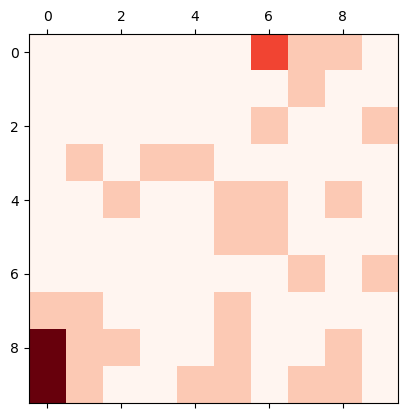

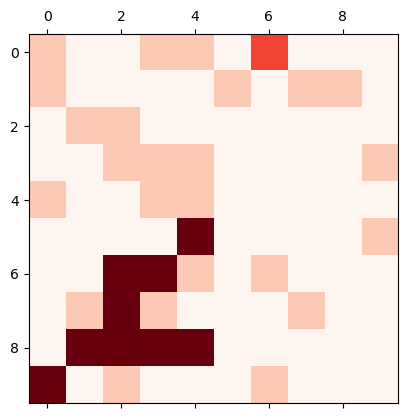

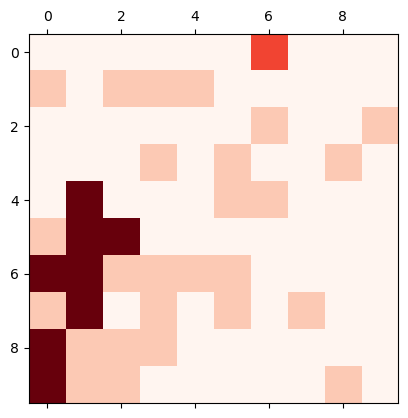

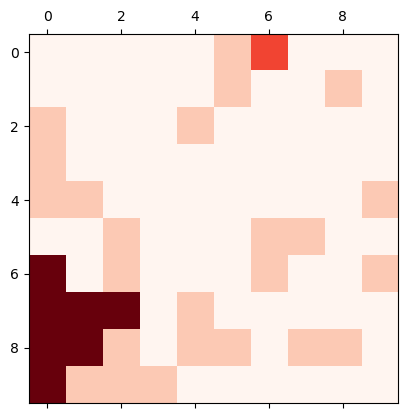

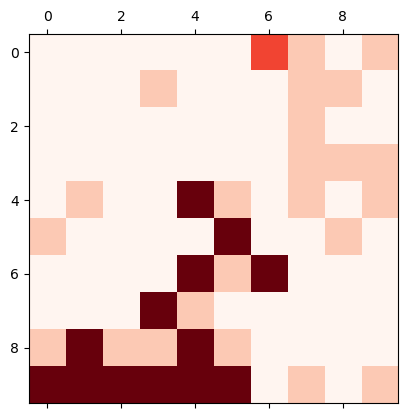

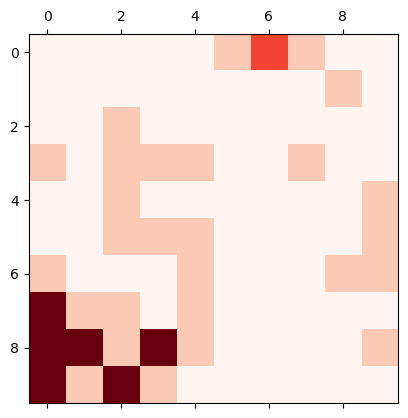

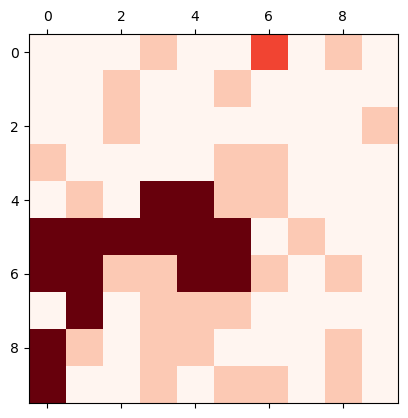

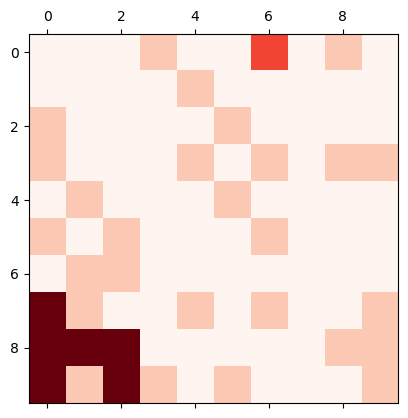

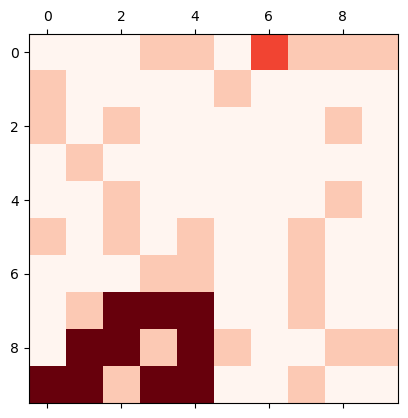

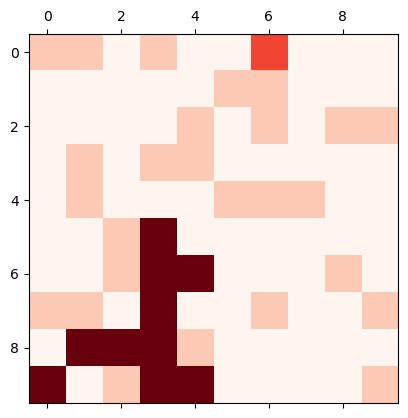

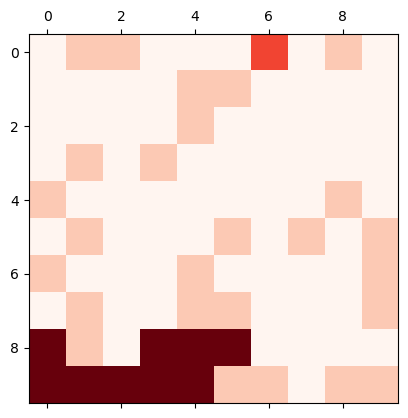

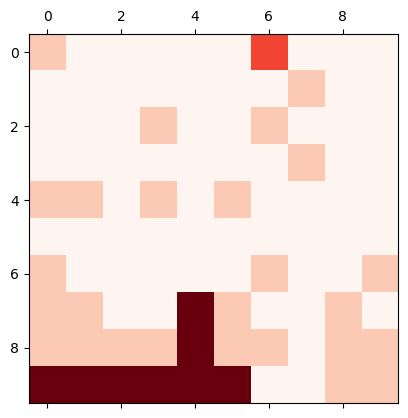

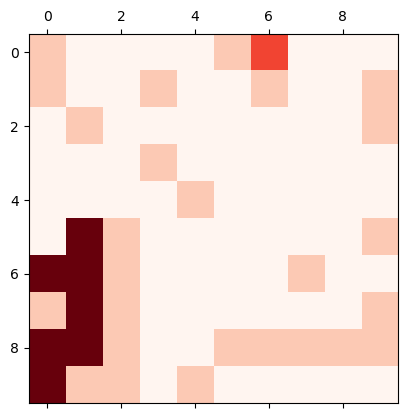

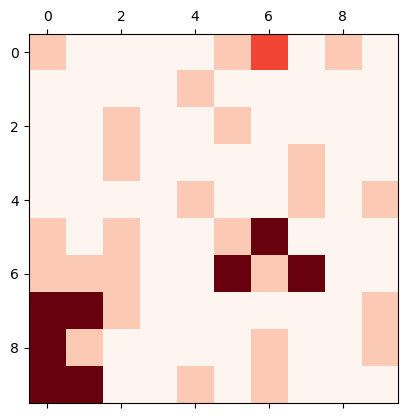

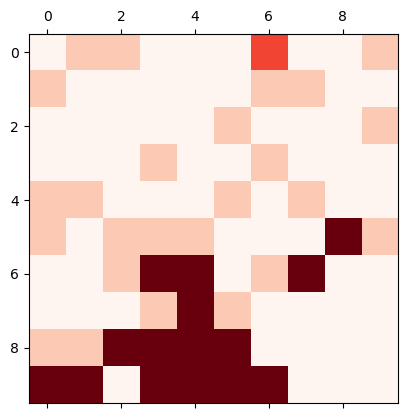

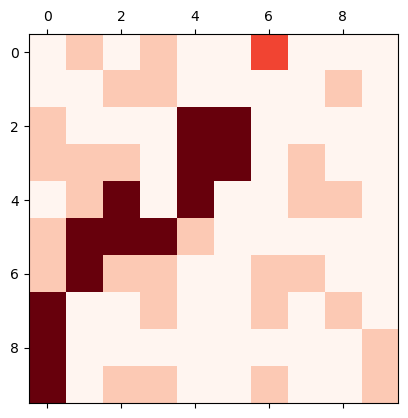

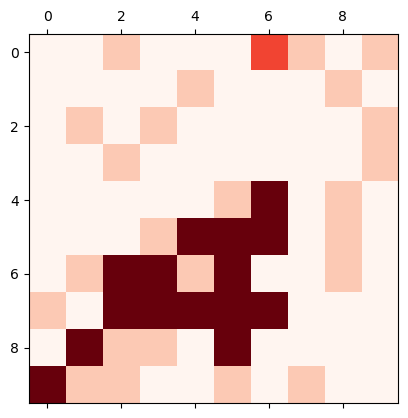

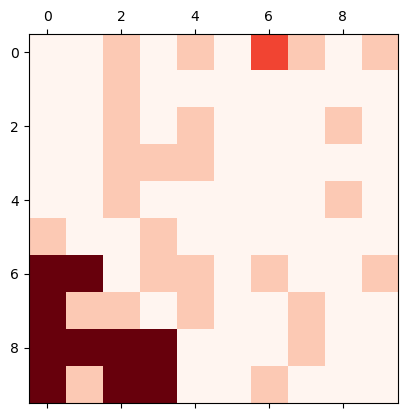

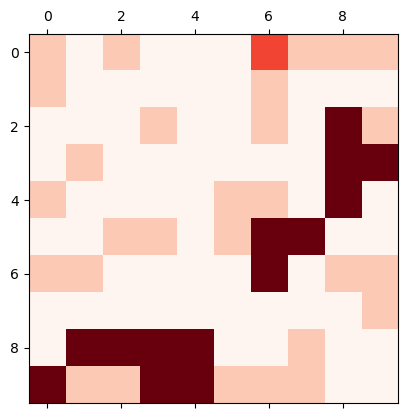

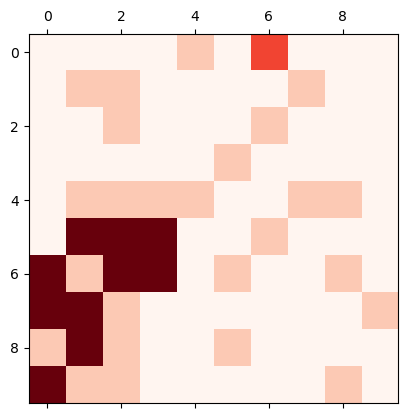

In [115]:
#implementation
##########################
import time
timer= []
impl=[]
####################
for i in range(20): # 20 problems
    #####################################3
    # Start time
    start_time = time.time()
    #############################################
    #grid
    grid_env = GridEnvironment(size, obstacle_density)
    grid=grid_env.grid

    # Run the genetic algorithm

    best_paths = genetic_algorithm()

    # Display the result and plot best path
    final_best_path = min(best_paths, key=fitness)
    #visualization
    fig, ax = plt.subplots()
    sum_of_values=0
          #Goal cell
          ########################################
    goal = (0,6)
    grid[goal]=3
    for x,y in final_best_path:
        grid[x][y]=5
        # Sample array
        ###############################cases evaluation
    #conver 2d arr to 1d
    my_1d_array = [element for row in grid for element in row]
    # sum of best soltion in the generation (9 grnerations)

    sum_val=sum(my_1d_array)
    impl.append(sum_val)
    # End time
    end_time = time.time()

    # Calculate the execution time avg time
    execution_time = end_time - start_time
    timer.append(execution_time)
   

#visualization
    ax.matshow(grid, cmap=plt.cm.Reds) # blue

#   ax.matshow(grid) # black and yellow





In [116]:
#sum of values of grids (problems)
print(impl)
len(impl)

[41, 72, 69, 62, 91, 60, 106, 60, 81, 79, 74, 69, 64, 68, 103, 96, 102, 79, 101, 78]


20

In [117]:
print(timer)
len(timer)

[0.028998136520385742, 0.02803516387939453, 0.026001453399658203, 0.02700066566467285, 0.026005983352661133, 0.026002168655395508, 0.024999141693115234, 0.025000333786010742, 0.026000499725341797, 0.025994539260864258, 0.025998592376708984, 0.02599787712097168, 0.0260007381439209, 0.02600240707397461, 0.02700042724609375, 0.026001930236816406, 0.02599954605102539, 0.026004791259765625, 0.02700328826904297, 0.20199990272521973]


20

In [118]:
#  convert timer list to df
# Create a DataFrame from the timer list
import pandas as pd
df_timer = pd.DataFrame(timer, columns=['Time'])

# Print the DataFrame
print(df_timer.head())

min_value = df_timer['Time'].min()
min_index = df_timer['Time'].idxmin()

print('the best case is', min_index, 'with sum value of ', min_value)


max_value = df_timer['Time'].max()
max_index = df_timer['Time'].idxmax()

print('the worst case is', max_index, 'with sum value of ', max_value)

       Time
0  0.028998
1  0.028035
2  0.026001
3  0.027001
4  0.026006
the best case is 6 with sum value of  0.024999141693115234
the worst case is 19 with sum value of  0.20199990272521973


In [119]:
# convert value list to dataframe


# Convert the list to a Pandas DataFrame
df = pd.DataFrame(impl, columns=['Sum of Values'])

# Add an index column
df.index += 1

# Print the DataFrame
print(df.head())
min_value = df['Sum of Values'].min()
min_index = df['Sum of Values'].idxmin()

print('the best case is', min_index, 'with sum value of ', min_value)


max_value = df['Sum of Values'].max()
max_index = df['Sum of Values'].idxmax()

print('the worst case is', max_index, 'with sum value of ', max_value)

   Sum of Values
1             41
2             72
3             69
4             62
5             91
the best case is 1 with sum value of  41
the worst case is 7 with sum value of  106


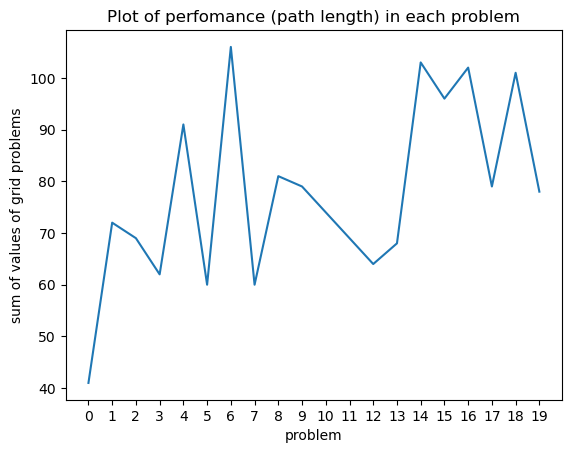

In [120]:
import matplotlib.pyplot as plt
# Customize x-axis tick marks
tick_positions = range(0,21)
tick_labels = range(0,21)
plt.xticks(tick_positions, tick_labels)


x=range(0,20)
y= df['Sum of Values']
# Plot scatter
plt.plot(x, y)

# Plot histogram
#plt.hist(data, bins=num_bins)

# Set labels and title
plt.xlabel('problem')
plt.ylabel('sum of values of grid problems')
plt.title('Plot of perfomance (path length) in each problem')

# Show the plot
plt.show()

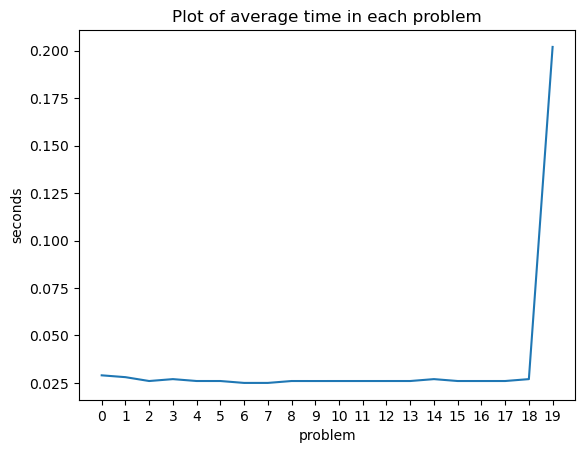

In [121]:
import matplotlib.pyplot as plt
# Customize x-axis tick marks
tick_positions = range(0,21)
tick_labels = range(0,21)
plt.xticks(tick_positions, tick_labels)


x=range(0,20)
y= df_timer['Time']
# Plot scatter
plt.plot(x, y)

# Plot histogram
#plt.hist(data, bins=num_bins)

# Set labels and title
plt.xlabel('problem')
plt.ylabel('seconds')
plt.title('Plot of average time in each problem')

# Show the plot
plt.show()

## خطوة تحليل النتائج تتضمن الوقت لكل مشكلة ومناقشة الحلول والمسارات وكثافة العوائق في بعض المتاهات أكثر من غيرها  (كتابة الشرح للنتائج بشكل منمق)

